In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load labels
df = pd.read_csv("mel_labels.csv")

# Folder where your images are stored
IMAGE_FOLDER = "mel_spectrograms/"

# Add full path for Keras
df["filepath"] = IMAGE_FOLDER + df["image"]

print(df.head())


                       image instrument intensity  \
0     BTb-ord-F#1-pp-N-N.png  Bass Tuba        pp   
1  BTb-ord-G1-pp-N-R100u.png  Bass Tuba        pp   
2  BTb-ord-G#1-pp-N-T16u.png  Bass Tuba        pp   
3   BTb-ord-A1-pp-N-T23d.png  Bass Tuba        pp   
4     BTb-ord-A#1-pp-N-N.png  Bass Tuba        pp   

                                     filepath  
0     mel_spectrograms/BTb-ord-F#1-pp-N-N.png  
1  mel_spectrograms/BTb-ord-G1-pp-N-R100u.png  
2  mel_spectrograms/BTb-ord-G#1-pp-N-T16u.png  
3   mel_spectrograms/BTb-ord-A1-pp-N-T23d.png  
4     mel_spectrograms/BTb-ord-A#1-pp-N-N.png  


In [2]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

print("Train:", len(train_df))
print("Val:", len(val_df))


Train: 2330
Val: 583


In [3]:
datagen = ImageDataGenerator(rescale=1/255.)

train_gen = datagen.flow_from_dataframe(
    train_df,
    x_col="filepath",
    y_col="instrument",      # your label column
    target_size=(224, 224),
    class_mode="categorical"
)

val_gen = datagen.flow_from_dataframe(
    val_df,
    x_col="filepath",
    y_col="instrument",
    target_size=(224, 224),
    class_mode="categorical"
)


Found 2330 validated image filenames belonging to 14 classes.
Found 583 validated image filenames belonging to 14 classes.


In [4]:
from tensorflow.keras import layers, models
num_classes = len(train_gen.class_indices)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

   

    layers.Flatten(),
   layers.Dense(128, activation='relu'),
    #layers.Dropout(0.3),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 505ms/step - accuracy: 0.4717 - loss: 1.8407 - val_accuracy: 0.7238 - val_loss: 0.7692
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 30s 413ms/step - accuracy: 0.7824 - loss: 0.6660 - val_accuracy: 0.9005 - val_loss: 0.4166
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 32s 440ms/step - accuracy: 0.8700 - loss: 0.3821 - val_accuracy: 0.9348 - val_loss: 0.2378
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 32s 435ms/step - accuracy: 0.9305 - loss: 0.2045 - val_accuracy: 0.9434 - val_loss: 0.1591
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 455ms/step - accuracy: 0.9455 - loss: 0.1664 - val_accuracy: 0.9657 - val_loss: 0.1073
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 446ms/step - accuracy: 0.9395 - loss: 0.1539 - val_accuracy: 0.9605 - val_loss: 0.1080
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 32s 435ms/step - accuracy: 0.9730 - loss: 0.0902 - val_accuracy: 0.9743 - val_loss: 0.0820
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 570ms/step - accuracy: 0.9811 - loss: 0.0644 - val_accu

In [6]:
train_acc = history.history["accuracy"][-1]
val_acc = history.history["val_accuracy"][-1]
train_loss = history.history["loss"][-1]
val_loss = history.history["val_loss"][-1]

print("Final Train Accuracy:", train_acc)
print("Final Val Accuracy:", val_acc)
print("Final Train Loss:", train_loss)
print("Final Val Loss:", val_loss)


Final Train Accuracy: 0.9819742441177368
Final Val Accuracy: 0.9811320900917053
Final Train Loss: 0.0597662478685379
Final Val Loss: 0.050918713212013245


In [7]:
accuracy_gap = train_acc - val_acc
print("Accuracy Gap:", accuracy_gap)


Accuracy Gap: 0.0008421540260314941


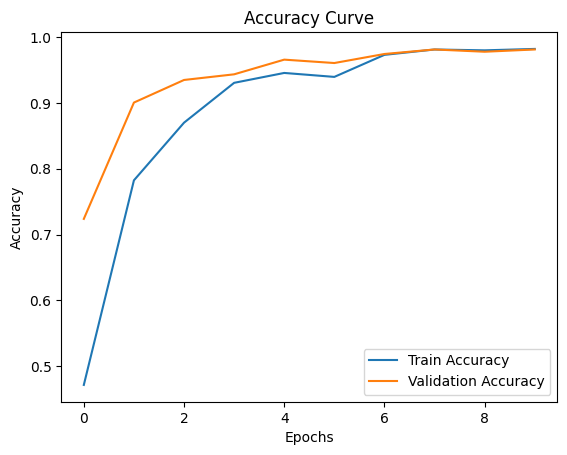

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()


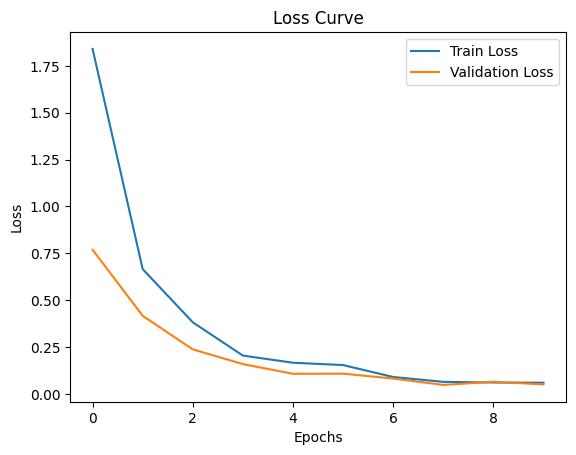

In [9]:
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()


In [10]:
if accuracy_gap > 0.1:
    print("Model is likely overfitting")
else:
    print("Model generalizes well")


Model generalizes well


In [11]:
model.save("instrument_cnn_model.h5")
print("Model saved as instrument_cnn_model.h5")


Model saved as instrument_cnn_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step


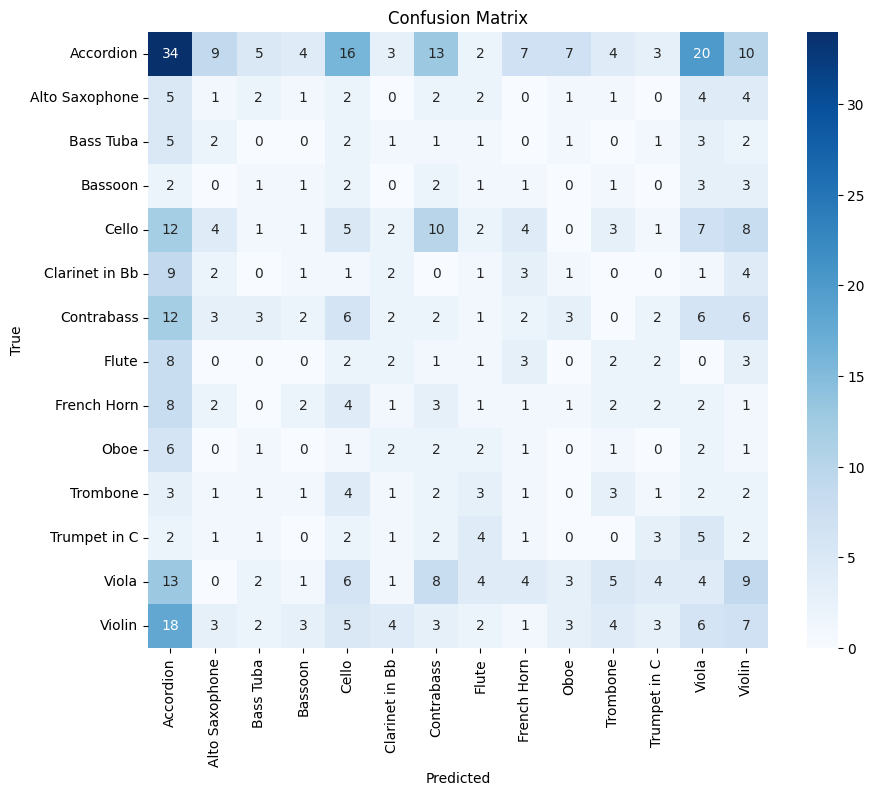

                precision    recall  f1-score   support

     Accordion       0.25      0.25      0.25       137
Alto Saxophone       0.04      0.04      0.04        25
     Bass Tuba       0.00      0.00      0.00        19
       Bassoon       0.06      0.06      0.06        17
         Cello       0.09      0.08      0.08        60
Clarinet in Bb       0.09      0.08      0.09        25
    Contrabass       0.04      0.04      0.04        50
         Flute       0.04      0.04      0.04        24
   French Horn       0.03      0.03      0.03        30
          Oboe       0.00      0.00      0.00        19
      Trombone       0.12      0.12      0.12        25
  Trumpet in C       0.14      0.12      0.13        24
         Viola       0.06      0.06      0.06        64
        Violin       0.11      0.11      0.11        64

      accuracy                           0.11       583
     macro avg       0.08      0.07      0.07       583
  weighted avg       0.11      0.11      0.11 

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the validation set
val_gen.reset()  # Make sure generator starts from the first batch
preds = model.predict(val_gen, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

# Get class labels
class_labels = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels))
